# Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento e visualização do dataset IRIS

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(iris.target_names)
print(y)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
df['species'] = pd.Categorical.from_codes(y, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Pré-processamento dos dados

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

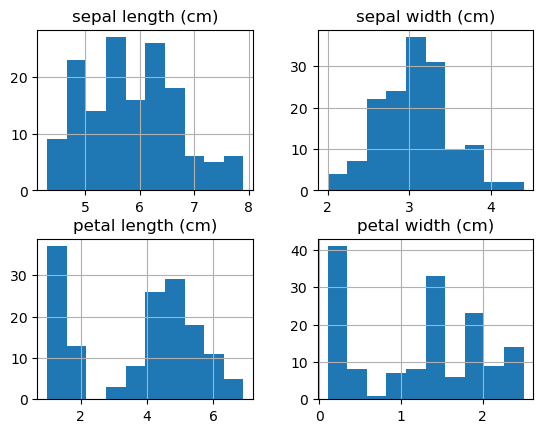

In [7]:
df.hist()

In [8]:
# Normalização dos dados (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
pd.DataFrame(X_scaled, columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

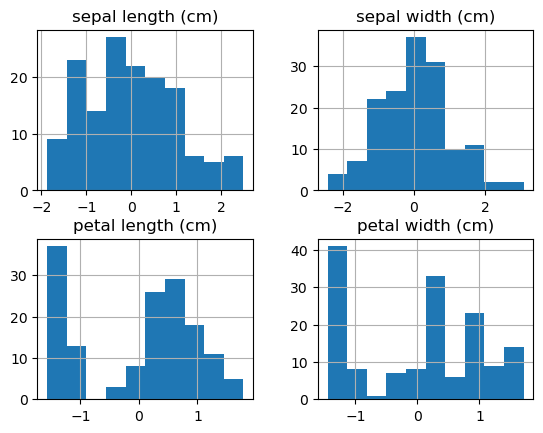

In [10]:
pd.DataFrame(X_scaled, columns=iris.feature_names).hist()

# Divisão dos dados em treinamento e teste (80% treino e 20% teste)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [13]:
X_train[:10]

array([[-1.50652052,  1.24920112, -1.56757623, -1.3154443 ],
       [-0.17367395,  3.09077525, -1.2833891 , -1.05217993],
       [ 1.03800476,  0.09821729,  0.36489628,  0.26414192],
       [-1.26418478,  0.78880759, -1.22655167, -1.3154443 ],
       [-1.74885626,  0.32841405, -1.39706395, -1.3154443 ],
       [ 0.55333328, -1.28296331,  0.70592084,  0.92230284],
       [ 0.67450115,  0.32841405,  0.42173371,  0.3957741 ],
       [-0.7795133 ,  1.01900435, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.7795133 ,  2.40018495, -1.2833891 , -1.44707648]])

In [14]:
y_train[:10]

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

# Treinamento de um modelo (Random Forest)

In [15]:
# o parâmetro n_estimators é o número de árvores que serão usadas
model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Avaliação do modelo

In [16]:
# obter as predições para os dados de teste
y_pred = model.predict(X_test)

In [17]:
print(y_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [18]:
# Calculo das métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


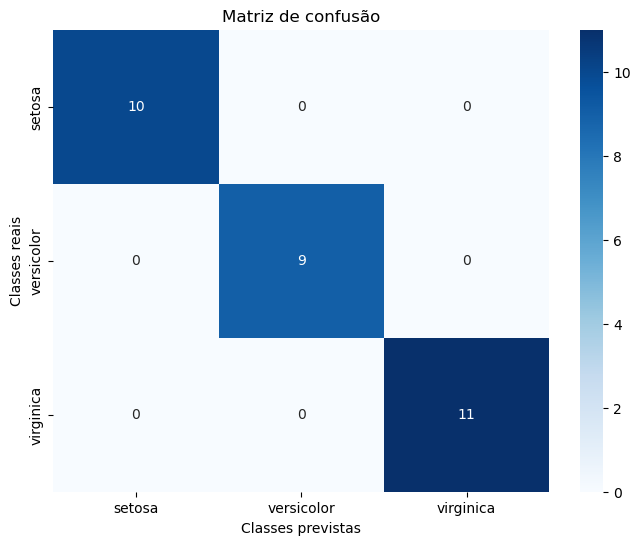

In [19]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de confusão')
plt.xlabel('Classes previstas')
plt.ylabel('Classes reais')
plt.show()

# Visualização dos resultados

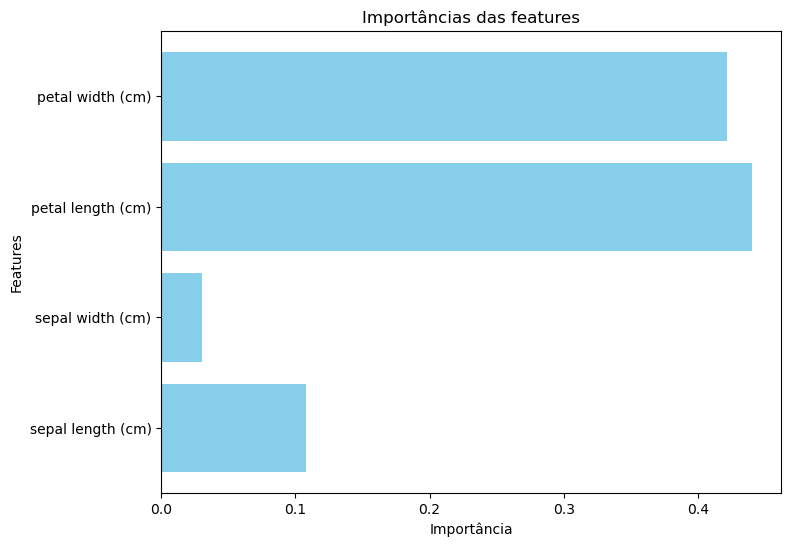

In [20]:
# Visualizando a importância das variáveis no modelo
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances, color='skyblue')
plt.title('Importâncias das features')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

# Análise da acurácia em função da quantidade de dados de treinamento

In [21]:
data = []

for i in range(1,50, 1):
    test_size = i/50 # de 0.02 até 0.98
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size)
    
    model_tree = DecisionTreeClassifier()
    model_tree.fit(X_train, y_train)
    
    y_pred_tree = model_tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    
    model_rf = RandomForestClassifier(n_estimators=100)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    data.append([1-test_size, accuracy_tree, accuracy_rf])
    

In [22]:
df_data = pd.DataFrame(data, columns=['training_size', 'accuracy_tree', 'accuracy_rf'])
df_data.head()

,training_size,accuracy_tree,accuracy_rf
0,0.98,1.000000,1.000000
1,0.96,1.000000,1.000000
2,0.94,1.000000,1.000000
3,0.92,0.916667,0.833333
4,0.90,0.933333,0.933333


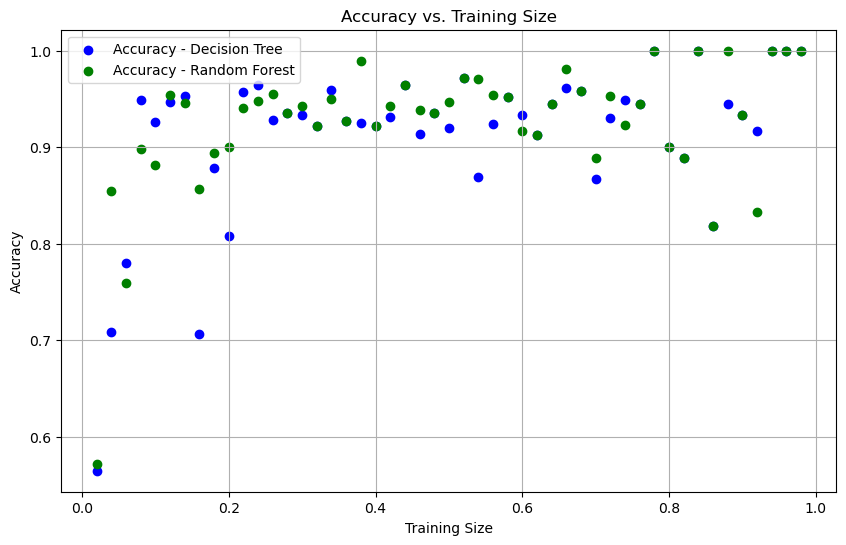

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df_data['training_size'], df_data['accuracy_tree'], label='Accuracy - Decision Tree', color='b')
plt.scatter(df_data['training_size'], df_data['accuracy_rf'], label='Accuracy - Random Forest', color='g')

# Adicionando título e rótulos
plt.title('Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()